# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit,njit,float64,int32
import numba as nb
import pandas as pd
from derivative import dxdt

# Time Parameters

In [2]:
tiempo_vida_inicial = 20
tiempo_vida_maximo = 150            #Para que los resultados obtenidos se encuentren ligados a realidad biologica
pasos_integracion = tiempo_vida_maximo-  tiempo_vida_inicial         #Definicion de los pasos de integracion de algoritmo   #Tasa de propagacion de daño
h = (tiempo_vida_maximo-tiempo_vida_inicial)/pasos_integracion  

# Functions

In [3]:
def f(frailty, internal_damage_rate, exogenous_damage_rate, t=None):
    return (internal_damage_rate*frailty + exogenous_damage_rate)

def Runke_Kutta_Method(temporal_evolution:list, internal_damage_rate, exogenous_damage_rate, mortality_rate, coupling_factor, condicion_inicial):
    frailty = condicion_inicial                                        #Initial condition     
    frailty_index = np.empty((len(temporal_evolution)))
    for index, t in enumerate(temporal_evolution):
        frailty_index[index] = frailty
        k1 = h*f(frailty, internal_damage_rate, exogenous_damage_rate, t=t)
        k2 = h*f(frailty + 0.5*k1, internal_damage_rate, exogenous_damage_rate, t=t +0.5*h)
        frailty += k2

    gompertz_law = mortality_rate*(frailty_index**(coupling_factor/internal_damage_rate))
    return frailty_index, gompertz_law, temporal_evolution

# Exogenous Damage Rate Modification

In [18]:
mortality_rate = 4.3*(10**(-6))     #Tasa de mortalidad #NO MODIFICA COMPORTAMIENTO LEY DE GOMPERTZ
internal_damage_rate = 0.09
coupling_factor = 0.2            #Factor de acoplamiento entre frailty index y gompertz
condicion_inicial = 0.05

parametro_beta = []
parametro_R = []

exogenous_damage_rate_steps_modification = [0.0, 0.0001, 0.001, 0.1]

for exogenous_damage_rate in exogenous_damage_rate_steps_modification: 
    temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
    frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution,internal_damage_rate, exogenous_damage_rate, mortality_rate, coupling_factor, condicion_inicial)
    
    valores_beta_R = np.empty((2), dtype = object)
    temporal_evolution = temporal_evolution_differential_equation
    data = gompertz_law_differential_equation
    derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
    beta_values = derivative_process/data
    R_values = data/np.e**(beta_values*temporal_evolution)

    parametro_R.append(R_values)
    parametro_beta.append(beta_values)

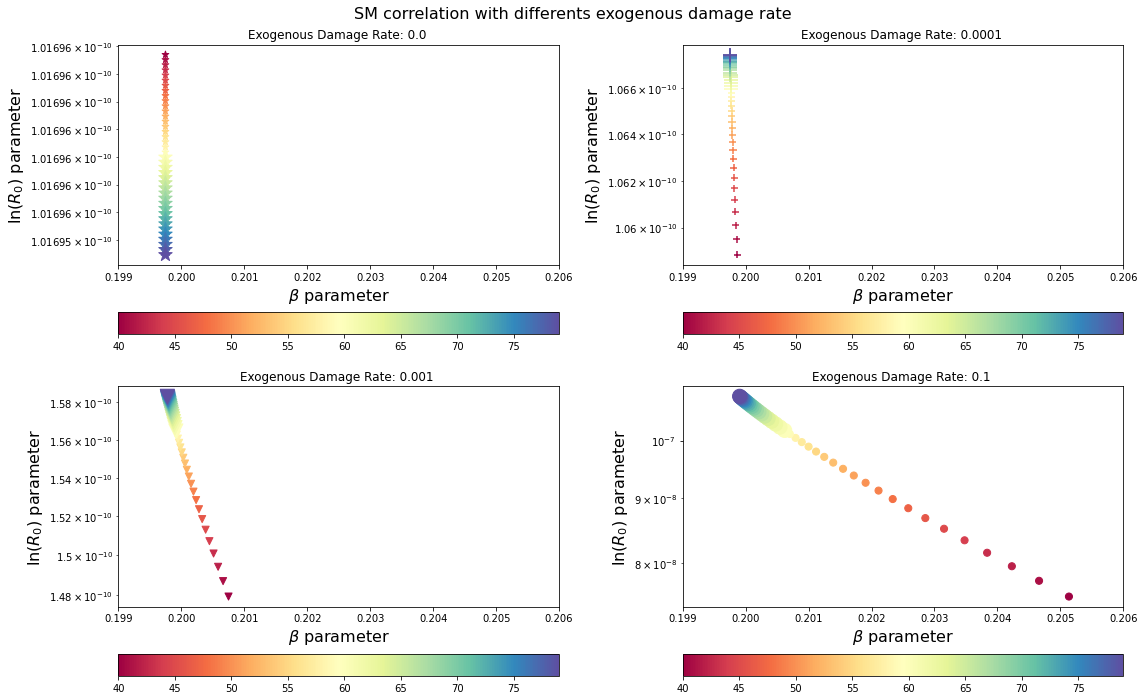

In [30]:
# Crear el subplot con 2 filas y 2 columnas
plt.figure(figsize=(16,10))
plt.suptitle(r"SM correlation with differents exogenous damage rate", fontsize= 16)

sizes = [50,200]
markers = ["*", "+", "v", "o"]

sm2 = plt.cm.ScalarMappable(cmap=plt.cm.Spectral, norm=plt.Normalize(vmin=min(temporal_evolution[20:60]), vmax=max(temporal_evolution[20:60])))
sm2.set_array([])  # Set an empty array to create the colorbar based on the colormap
A_values_2 = np.arange(0, len(temporal_evolution[20:60]), 1)  # Replace this with your parameter A values
colors2 = plt.cm.Spectral(A_values_2 / max(A_values_2))  # Normalize A_values between 0 and 1

plt.subplot(2, 2, 1)
plt.scatter(parametro_beta[0][40:60], parametro_R[0][40:60], color = colors2[0:20], marker= markers[0], s = sizes[0]) 
plt.scatter(parametro_beta[0][60:80], parametro_R[0][60:80], color = colors2[20:40], marker= markers[0], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[0]} ')
#plt.xlim(0.18, 0.85)
plt.yscale("log")
plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

plt.subplot(2, 2, 2)
plt.scatter(parametro_beta[1][40:60], parametro_R[1][40:60], color = colors2[0:20], marker= markers[1], s = sizes[0]) 
plt.scatter(parametro_beta[1][60:80], parametro_R[1][60:80], color = colors2[20:40], marker= markers[1], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[1]} ')
#plt.xlim(0.18, 0.85)
plt.yscale("log")
plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

plt.subplot(2, 2, 3)
plt.scatter(parametro_beta[2][40:60], parametro_R[2][40:60], color = colors2[0:20], marker= markers[2], s = sizes[0]) 
plt.scatter(parametro_beta[2][60:80], parametro_R[2][60:80], color = colors2[20:40], marker= markers[2], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[2]} ')
#plt.xlim(0.18, 0.85)
plt.yscale("log")
plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

plt.subplot(2, 2, 4)
plt.scatter(parametro_beta[3][40:60], parametro_R[3][40:60], color = colors2[0:20], marker= markers[3], s = sizes[0]) 
plt.scatter(parametro_beta[3][60:80], parametro_R[3][60:80], color = colors2[20:40], marker= markers[3], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[3]} ')
#plt.xlim(0.18, 0.22)
plt.yscale("log")
plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.savefig("SM_Correlation_different_Exogenous_Damage_Rate.jpg", dpi = 1000)


# Internal Damage Rate

In [42]:
mortality_rate = 4.3*(10**(-6))     #Tasa de mortalidad #NO MODIFICA COMPORTAMIENTO LEY DE GOMPERTZ
coupling_factor = 0.2            #Factor de acoplamiento entre frailty index y gompertz
condicion_inicial = 0.05

parametro_beta = []
parametro_R = []

exogenous_damage_rate = 0.01
internal_damage_rate_steps = [0.02, 0.04, 0.06, 0.08]

for internal_damage_rate in internal_damage_rate_steps: 
    temporal_evolution = np.arange(tiempo_vida_inicial,tiempo_vida_maximo,h) 
    frailty_index_differential_equation,gompertz_law_differential_equation,temporal_evolution_differential_equation = Runke_Kutta_Method(temporal_evolution,internal_damage_rate, exogenous_damage_rate, mortality_rate, coupling_factor, condicion_inicial)
    
    valores_beta_R = np.empty((2), dtype = object)
    temporal_evolution = temporal_evolution_differential_equation
    data = gompertz_law_differential_equation
    derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
    beta_values = derivative_process/data
    R_values = data/np.e**(beta_values*temporal_evolution)

    parametro_R.append(R_values)
    parametro_beta.append(beta_values)

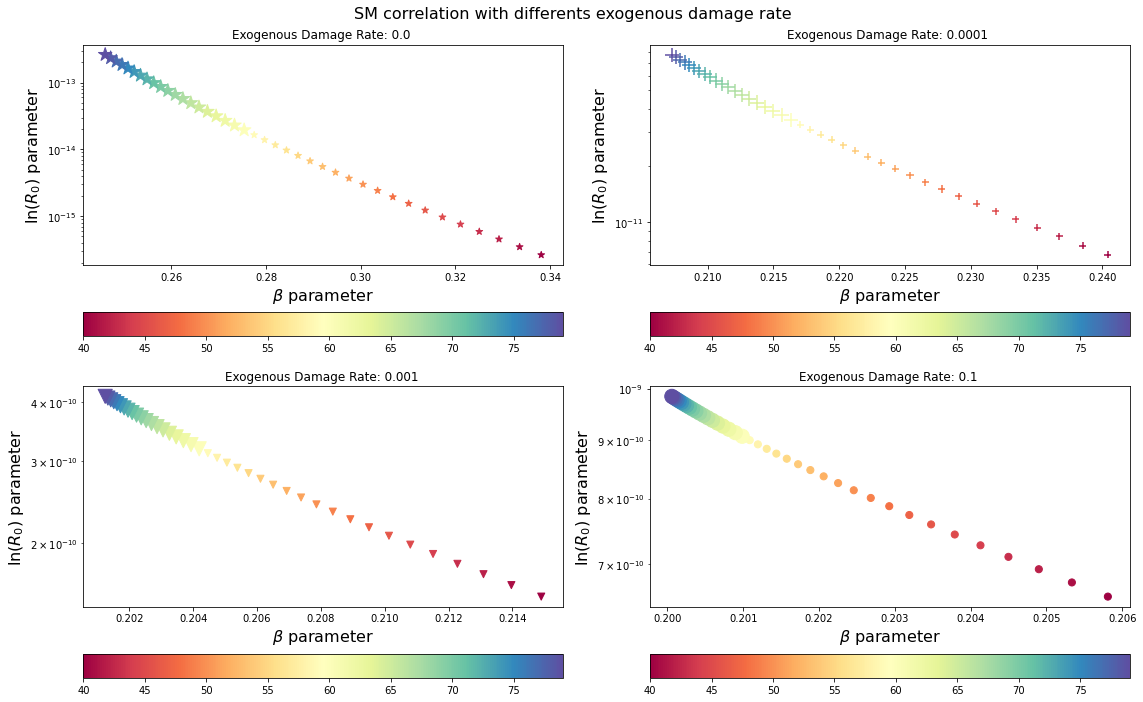

In [44]:
# Crear el subplot con 2 filas y 2 columnas
plt.figure(figsize=(16,10))
plt.suptitle(r"SM correlation with differents exogenous damage rate", fontsize= 16)

sizes = [50,200]
markers = ["*", "+", "v", "o"]

sm2 = plt.cm.ScalarMappable(cmap=plt.cm.Spectral, norm=plt.Normalize(vmin=min(temporal_evolution[20:60]), vmax=max(temporal_evolution[20:60])))
sm2.set_array([])  # Set an empty array to create the colorbar based on the colormap
A_values_2 = np.arange(0, len(temporal_evolution[20:60]), 1)  # Replace this with your parameter A values
colors2 = plt.cm.Spectral(A_values_2 / max(A_values_2))  # Normalize A_values between 0 and 1

plt.subplot(2, 2, 1)
plt.scatter(parametro_beta[0][40:60], parametro_R[0][40:60], color = colors2[0:20], marker= markers[0], s = sizes[0]) 
plt.scatter(parametro_beta[0][60:80], parametro_R[0][60:80], color = colors2[20:40], marker= markers[0], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[0]} ')
#plt.xlim(0.18, 0.85)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

plt.subplot(2, 2, 2)
plt.scatter(parametro_beta[1][40:60], parametro_R[1][40:60], color = colors2[0:20], marker= markers[1], s = sizes[0]) 
plt.scatter(parametro_beta[1][60:80], parametro_R[1][60:80], color = colors2[20:40], marker= markers[1], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[1]} ')
#plt.xlim(0.18, 0.85)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

plt.subplot(2, 2, 3)
plt.scatter(parametro_beta[2][40:60], parametro_R[2][40:60], color = colors2[0:20], marker= markers[2], s = sizes[0]) 
plt.scatter(parametro_beta[2][60:80], parametro_R[2][60:80], color = colors2[20:40], marker= markers[2], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[2]} ')
#plt.xlim(0.18, 0.85)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

plt.subplot(2, 2, 4)
plt.scatter(parametro_beta[3][40:60], parametro_R[3][40:60], color = colors2[0:20], marker= markers[3], s = sizes[0]) 
plt.scatter(parametro_beta[3][60:80], parametro_R[3][60:80], color = colors2[20:40], marker= markers[3], s = sizes[1]) 
plt.title(f'Exogenous Damage Rate: {exogenous_damage_rate_steps_modification[3]} ')
#plt.xlim(0.18, 0.22)
plt.yscale("log")
#plt.xlim(0.199, 0.206)
plt.xlabel(r"$\beta$ parameter", fontsize = 16)
plt.ylabel(r"$\ln(R_0)$ parameter", fontsize = 16)
cbar2 = plt.colorbar(sm2, orientation = "horizontal")

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
#plt.savefig("SM_Correlation_different_Exogenous_Damage_Rate.jpg", dpi = 1000)